In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pickle 

def compute_crr(loc, date):
    CRRCoefficients = [9.0e+08,
                        -8.28687176e-02,
                       1.90003955e-01,
                       -4.6e+01,
                       3.99996036e+00,
                       -2.3e+02,
                       3.99997842e+00,
                       2.99966504e+00]

    ir = np.load(f"/data/GPM_HIM8/exp_paper/X_B14_{loc}_{date}.npy")[:,::4,::4]
    wv = np.load(f"/data/GPM_HIM8/exp_paper/X_B8_{loc}_{date}.npy")[:,::4,::4]
    dif = ir-wv
    
    H_IR = CRRCoefficients[0] * np.exp(ir * CRRCoefficients[1])

    C_IR = CRRCoefficients[2] * ir + CRRCoefficients[3]

    W_IR = CRRCoefficients[4] * \
           np.exp( -0.5 * ((ir + CRRCoefficients[5]) / CRRCoefficients[6]) ** 2.0) + \
           CRRCoefficients[7] 

    return H_IR * np.exp(-0.5 * ((((dif) - C_IR) / W_IR) ** 2.0))

def gpm_prec(loc, date):
    return np.clip(np.load(f"/data/GPM_HIM8/exp_paper/Y_{loc}_{date}.npy"),0,40)

def cnn_prec(loc, date, b1, b2, seed):
    i = ["201811","201812","201901","201902"].index(date)
    return np.clip(np.load(f"/data/GPM_HIM8/models/yhat_{loc}_v{i}_b{b1}_{b2}_s{seed}.npy"),0,40)

def rf_prec(loc, date):
    rf = pickle.load(open(f'rf_{loc}_{date}.pkl', 'rb'))

    b11 = np.load(f"/data/GPM_HIM8/exp_paper/X_B11_{loc}_{date}.npy")[:,::4,::4]
    b16 = np.load(f"/data/GPM_HIM8/exp_paper/X_B16_{loc}_{date}.npy")[:,::4,::4]
    
    x = np.stack((b11.flatten(),b16.flatten()),axis=1)

    return rf.predict(x).reshape((-1,128,128))

SYD 201811
(1435, 128, 128) (1435, 128, 128) (1435, 128, 128) (1435, 128, 128)
SYD 201812
(1482, 128, 128) (1482, 128, 128) (1482, 128, 128) (1482, 128, 128)
SYD 201901
(1460, 128, 128) (1460, 128, 128) (1460, 128, 128) (1460, 128, 128)
SYD 201902
(1332, 128, 128) (1332, 128, 128) (1332, 128, 128) (1332, 128, 128)
NT 201811
(1435, 128, 128) (1435, 128, 128) (1435, 128, 128) (1435, 128, 128)
NT 201812
(1483, 128, 128) (1483, 128, 128) (1483, 128, 128) (1483, 128, 128)
NT 201901
(1460, 128, 128) (1460, 128, 128) (1460, 128, 128) (1460, 128, 128)
NT 201902
(1335, 128, 128) (1335, 128, 128) (1335, 128, 128) (1335, 128, 128)
WA 201811
(1435, 128, 128) (1435, 128, 128) (1435, 128, 128) (1435, 128, 128)
WA 201812
(1482, 128, 128) (1482, 128, 128) (1482, 128, 128) (1482, 128, 128)
WA 201901
(1459, 128, 128) (1459, 128, 128) (1459, 128, 128) (1459, 128, 128)
WA 201902
(1334, 128, 128) (1334, 128, 128) (1334, 128, 128) (1334, 128, 128)


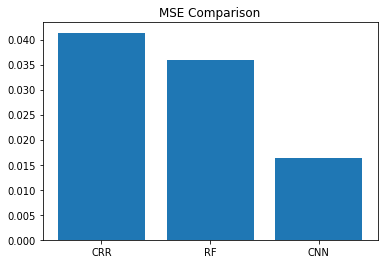

In [33]:
def mse_cmp(loc, date):
    gpm = gpm_prec(loc, date)
    crr = compute_crr(loc, date)
    rf = rf_prec(loc, date)
    cnn = cnn_prec(loc, date, 11, 16, 1)[:,:,:,0]
    
    print(gpm.shape, crr.shape, rf.shape, cnn.shape)
    
    plt.clf()
    plt.title("MSE Comparison")
    plt.bar(['CRR','RF','CNN'], [np.mean(np.square(gpm-crr)), np.mean(np.square(gpm-rf)), np.mean(np.square(cnn-crr))])
    plt.savefig(f'MSE_{loc}_{date}.png')


for loc in ["SYD","NT","WA"]:
    for date in ["201811","201812","201901","201902"]:   
        print(loc, date)
        mse_cmp(loc, date)

In [5]:
%matplotlib inline

from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import pickle 

def compute_crr(loc, date):
    CRRCoefficients = [9.0e+08,
                        -8.28687176e-02,
                       1.90003955e-01,
                       -4.6e+01,
                       3.99996036e+00,
                       -2.3e+02,
                       3.99997842e+00,
                       2.99966504e+00]

    ir = np.load(f"/data/GPM_HIM8/exp_paper/X_B14_{loc}_{date}.npy")[:,::4,::4]
    wv = np.load(f"/data/GPM_HIM8/exp_paper/X_B8_{loc}_{date}.npy")[:,::4,::4]
    dif = ir-wv
    
    H_IR = CRRCoefficients[0] * np.exp(ir * CRRCoefficients[1])

    C_IR = CRRCoefficients[2] * ir + CRRCoefficients[3]

    W_IR = CRRCoefficients[4] * \
           np.exp( -0.5 * ((ir + CRRCoefficients[5]) / CRRCoefficients[6]) ** 2.0) + \
           CRRCoefficients[7] 

    return H_IR * np.exp(-0.5 * ((((dif) - C_IR) / W_IR) ** 2.0))

def gpm_prec(loc, date):
    return np.clip(np.load(f"/data/GPM_HIM8/exp_paper/Y_{loc}_{date}.npy"),0,40)

def cnn_prec(loc, date, b1, b2, seed):
    i = ["201811","201812","201901","201902"].index(date)
    return np.clip(np.load(f"/data/GPM_HIM8/models/yhat_{loc}_v{i}_b{b1}_{b2}_s{seed}.npy"),0,40)

def rf_prec(loc, date):
    rf = pickle.load(open(f'rf_{loc}_{date}.pkl', 'rb'))

    b11 = np.load(f"/data/GPM_HIM8/exp_paper/X_B11_{loc}_{date}.npy")[:,::4,::4]
    b16 = np.load(f"/data/GPM_HIM8/exp_paper/X_B16_{loc}_{date}.npy")[:,::4,::4]
    
    x = np.stack((b11.flatten(),b16.flatten()),axis=1)

    return rf.predict(x).reshape((-1,128,128))


data = []
for loc in ["SYD","NT","WA"]:
    for date in ["201811","201812","201901","201902"]:
        print(loc, date)
        gpm = gpm_prec(loc, date)
        crr = compute_crr(loc, date)
        rf = rf_prec(loc, date)
        cnn = cnn_prec(loc, date, 11, 16, 1)[:,:,:,0]
        for t in [0.2,1.0,5.0]:
            data.append({'Loc': loc,
                         'score': f1_score(gpm.flatten()>t,crr.flatten()>t),
                         'model': "CRR",
                         'threshold [mm/h]': t})
            data.append({'Loc': loc,
                         'score': f1_score(gpm.flatten()>t,rf.flatten()>t),
                         'model': "RF",
                         'threshold [mm/h]': t})
            data.append({'Loc': loc,
                         'score': f1_score(gpm.flatten()>t,cnn.flatten()>t),
                         'model': "CNN",
                         'threshold [mm/h]': t})


df = pd.DataFrame(data)
df

SYD 201811
SYD 201812
SYD 201901
SYD 201902
NT 201811
NT 201812
NT 201901
NT 201902
WA 201811
WA 201812
WA 201901
WA 201902


/home/pl5189/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Loc,score,model,threshold [mm/h]
0,SYD,0.471093,CRR,0.2
1,SYD,0.506042,RF,0.2
2,SYD,0.543495,CNN,0.2
3,SYD,0.384907,CRR,1.0
4,SYD,0.392248,RF,1.0
...,...,...,...,...
103,WA,0.138300,RF,1.0
104,WA,0.431801,CNN,1.0
105,WA,0.000000,CRR,5.0
106,WA,0.000000,RF,5.0


[]

<Figure size 432x288 with 0 Axes>

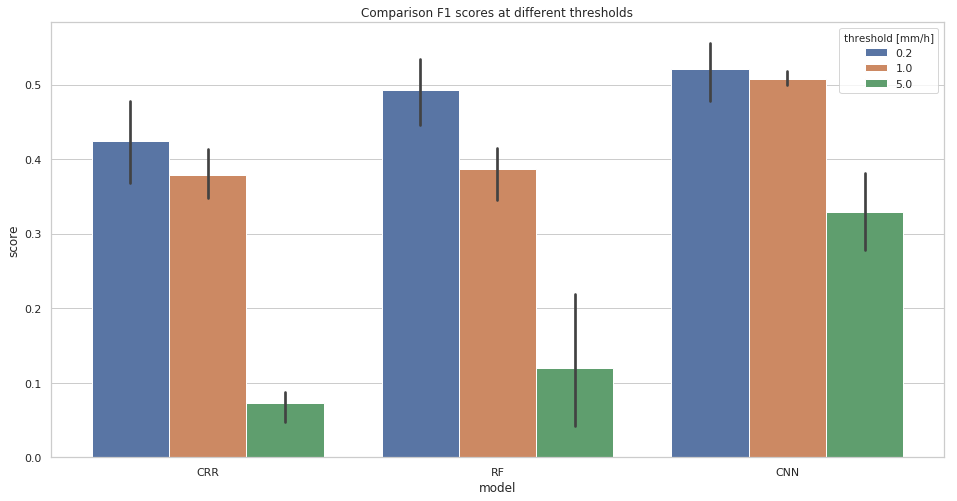

In [9]:
import seaborn as sns
sns.set(style="whitegrid")

plt.clf()
plt.figure(figsize=(16,8))

ax = sns.barplot(data=df[df['Loc']=="SYD"], x='model', y='score', hue="threshold [mm/h]")

ax.set_title(f"Comparison F1 scores at different thresholds")
plt.plot()

In [3]:
%matplotlib inline

from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import pickle 
from matplotlib import pyplot as plt

def compute_crr(loc, date):
    CRRCoefficients = [9.0e+08,
                        -8.28687176e-02,
                       1.90003955e-01,
                       -4.6e+01,
                       3.99996036e+00,
                       -2.3e+02,
                       3.99997842e+00,
                       2.99966504e+00]

    ir = np.load(f"/data/GPM_HIM8/exp_paper/X_B14_{loc}_{date}.npy")[:,::4,::4]
    wv = np.load(f"/data/GPM_HIM8/exp_paper/X_B8_{loc}_{date}.npy")[:,::4,::4]
    dif = ir-wv
    
    H_IR = CRRCoefficients[0] * np.exp(ir * CRRCoefficients[1])

    C_IR = CRRCoefficients[2] * ir + CRRCoefficients[3]

    W_IR = CRRCoefficients[4] * \
           np.exp( -0.5 * ((ir + CRRCoefficients[5]) / CRRCoefficients[6]) ** 2.0) + \
           CRRCoefficients[7] 

    return H_IR * np.exp(-0.5 * ((((dif) - C_IR) / W_IR) ** 2.0))

def gpm_prec(loc, date):
    return np.clip(np.load(f"/data/GPM_HIM8/exp_paper/Y_{loc}_{date}.npy"),0,40)

def cnn_prec(loc, date, b1, b2, seed):
    i = ["201811","201812","201901","201902"].index(date)
    return np.clip(np.load(f"/data/GPM_HIM8/models/yhat_{loc}_v{i}_b{b1}_{b2}_s{seed}.npy"),0,40)

def rf_prec(loc, date):
    rf = pickle.load(open(f'rf_{loc}_{date}.pkl', 'rb'))

    b11 = np.load(f"/data/GPM_HIM8/exp_paper/X_B11_{loc}_{date}.npy")[:,::4,::4]
    b16 = np.load(f"/data/GPM_HIM8/exp_paper/X_B16_{loc}_{date}.npy")[:,::4,::4]
    
    x = np.stack((b11.flatten(),b16.flatten()),axis=1)

    return rf.predict(x).reshape((-1,128,128))


#data = []
#for loc in ["SYD","NT","WA"]:
#for date in ["201811","201812","201901","201902"]:
    
loc = "SYD"
date = "201812"
    
    
gpm = gpm_prec(loc, date)
crr = compute_crr(loc, date)
rf = rf_prec(loc, date)
cnn = cnn_prec(loc, date, 11, 16, 1)[:,:,:,0]

print(gpm.shape, crr.shape, rf.shape, cnn.shape)

(1482, 128, 128) (1482, 128, 128) (1482, 128, 128) (1482, 128, 128)


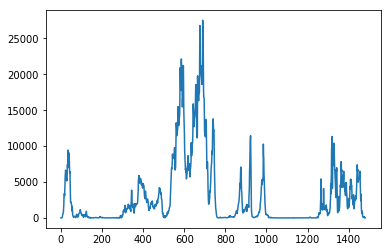

In [4]:
plt.plot(gpm.sum(axis=(1,2)))

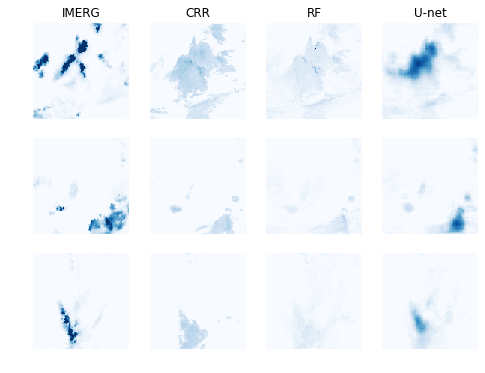

In [6]:
"""


%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

f, axarr = plt.subplots(3, 10, figsize=(15,5))

f.figsize=(26,16)

for band in range(10):
    for event in range(3):
        if band < 9:
            img = np.load(f"/data/GPM_HIM8/exp_paper/X_B{band+8}_SYD_201811.npy")[100*event,:,:]
        else:
            img = np.load(f"/data/GPM_HIM8/exp_paper/Y_SYD_201811.npy")[100*event,:,:]
            
        if band < 9:
            axarr[event,band].imshow(img, cmap=cm.Greys_r)
            if event == 0:
                axarr[event,band].set_title(f"Band {band+8}")
        else:
            axarr[event,band].imshow(img, cmap=cm.Blues)
            if event == 0:
                axarr[event,band].set_title(f"GPM Prec")
            
        axarr[event,band].axis('off')

plt.show()
"""


f, axarr = plt.subplots(3,4, figsize=(8,6))

i = 580
axarr[0,0].imshow(gpm[i], vmin=0, vmax=15, cmap='Blues')
axarr[0,0].set_title(f"IMERG")
axarr[0,0].axis('off')
axarr[0,1].imshow(crr[i], vmin=0, vmax=15, cmap='Blues')
axarr[0,1].set_title(f"CRR")
axarr[0,1].axis('off')
axarr[0,2].imshow(rf[i], vmin=0, vmax=15, cmap='Blues')
axarr[0,2].set_title(f"RF")
axarr[0,2].axis('off')
axarr[0,3].imshow(cnn[i], vmin=0, vmax=15, cmap='Blues')
axarr[0,3].set_title(f"U-net")
axarr[0,3].axis('off')

i = 700
axarr[1,0].imshow(gpm[i], vmin=0, vmax=15, cmap='Blues')
axarr[1,0].axis('off')
axarr[1,1].imshow(crr[i], vmin=0, vmax=15, cmap='Blues')
axarr[1,1].axis('off')
axarr[1,2].imshow(rf[i], vmin=0, vmax=15, cmap='Blues')
axarr[1,2].axis('off')
axarr[1,3].imshow(cnn[i], vmin=0, vmax=15, cmap='Blues')
axarr[1,3].axis('off')

i = 38
axarr[2,0].imshow(gpm[i], vmin=0, vmax=15, cmap='Blues')
axarr[2,0].axis('off')
axarr[2,1].imshow(crr[i], vmin=0, vmax=15, cmap='Blues')
axarr[2,1].axis('off')
axarr[2,2].imshow(rf[i], vmin=0, vmax=15, cmap='Blues')
axarr[2,2].axis('off')
axarr[2,3].imshow(cnn[i], vmin=0, vmax=15, cmap='Blues')
axarr[2,3].axis('off')

plt.show()

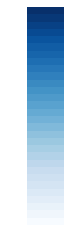

In [13]:
arr = np.arange(0,30)

plt.imshow(np.tile(arr, (5,1)).T, cmap='Blues_r')
_ = plt.axis('off')

In [ ]:
from sklearn.metrics import precision_score

def prec_cmp(loc, date, threshold):
    gpm = gpm_prec(loc, date)
    crr = compute_crr(loc, date)
    rf = rf_prec(loc, date)
    cnn = cnn_prec(loc, date, 11, 16, 1)[:,:,:,0]
    
    print(gpm.shape, crr.shape, rf.shape, cnn.shape)
    
    plt.clf()
    plt.title("Precision Comparison")
    plt.bar(['CRR','RF','CNN'], [precision_score(gpm.flatten()>threshold,crr.flatten()>threshold), precision_score(gpm.flatten()>threshold,rf.flatten()>threshold), precision_score(gpm.flatten()>threshold,cnn.flatten()>threshold)])
    plt.savefig(f'Precision_{loc}_{date}.png')


for loc in ["SYD","NT","WA"]:
    for date in ["201811","201812","201901","201902"]:   
        print(loc, date)
        prec_cmp(loc, date, 1)

In [ ]:
from sklearn.metrics import recall_score

def rec_cmp(loc, date, threshold):
    gpm = gpm_prec(loc, date)
    crr = compute_crr(loc, date)
    rf = rf_prec(loc, date)
    cnn = cnn_prec(loc, date, 11, 16, 1)[:,:,:,0]
    
    print(gpm.shape, crr.shape, rf.shape, cnn.shape)
    
    plt.clf()
    plt.title("Recall Comparison")
    plt.bar(['CRR','RF','CNN'], [recall_score(gpm.flatten()>threshold,crr.flatten()>threshold), recall_score(gpm.flatten()>threshold,rf.flatten()>threshold), recall_score(gpm.flatten()>threshold,cnn.flatten()>threshold)])
    plt.savefig(f'Recall_{loc}_{date}.png')


for loc in ["SYD","NT","WA"]:
    for date in ["201811","201812","201901","201902"]:   
        print(loc, date)
        rec_cmp(loc, date, 0.2)

In [7]:
np.sum(pr>0.1)/pr.size

0.11450986430204704

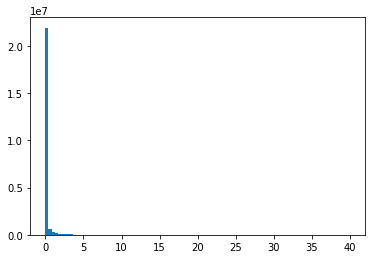

In [8]:
#Histogram Prec

_ = plt.hist(prp, bins=100)

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interactive


def f(t):
    plt.figure(figsize=(13,6))
    _ = plt.hist(ir[prp>t], bins=100)
    _ = plt.hist(dif[prp>t], bins=100)

interactive(f, t=(0., 10), continuous_update=False)

interactive(children=(FloatSlider(value=5.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

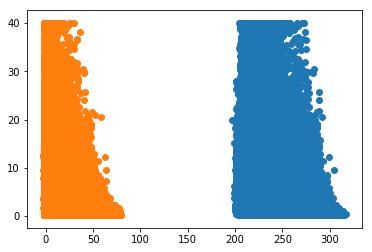

In [14]:
plt.scatter(ir[prp>0.2],prp[prp>0.2])
plt.scatter(dif[prp>0.2],prp[prp>0.2])

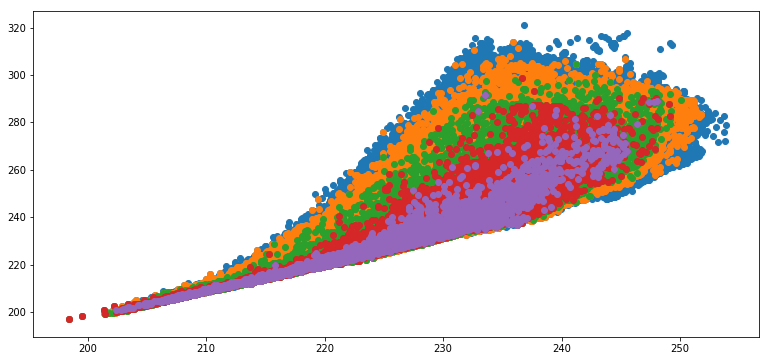

In [26]:
plt.figure(figsize=(13,6))
plt.scatter(wv[prp>0.1],ir[prp>0.1])
plt.scatter(wv[prp>1],ir[prp>1])
plt.scatter(wv[prp>5],ir[prp>5])
plt.scatter(wv[prp>10],ir[prp>10])
plt.scatter(wv[prp>20],ir[prp>20])

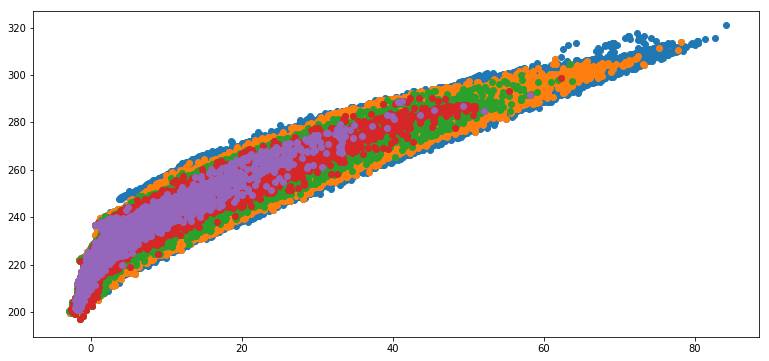

In [27]:
plt.figure(figsize=(13,6))
plt.scatter(dif[prp>0.1],ir[prp>0.1])
plt.scatter(dif[prp>1],ir[prp>1])
plt.scatter(dif[prp>5],ir[prp>5])
plt.scatter(dif[prp>10],ir[prp>10])
plt.scatter(dif[prp>20],ir[prp>20])

In [25]:
def f(t):
    plt.figure(figsize=(13,6))
    plt.scatter(wv[prp>0.1],ir[prp>0.1])
    plt.scatter(wv[prp>t],ir[prp>t])

interactive(f, t=(0.5, 20), continuous_update=False)

interactive(children=(FloatSlider(value=10.25, description='t', max=20.0, min=0.5), Output()), _dom_classes=('…

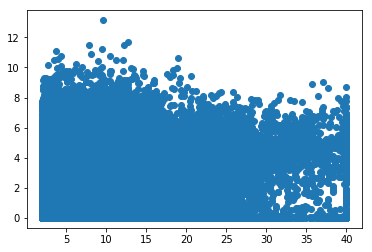

In [50]:
def calc_crr2(ir, dif):

    CRRCoefficients = [9.0e+08,
                        -8.28687176e-02,
                       1.90003955e-01,
                       -4.6e+01,
                       3.99996036e+00,
                       -2.3e+02,
                       3.99997842e+00,
                       2.99966504e+00]

    H_IR = CRRCoefficients[0] * np.exp(ir * CRRCoefficients[1])

    C_IR = CRRCoefficients[2] * ir + CRRCoefficients[3]

    W_IR = CRRCoefficients[4] * \
           np.exp( -0.5 * ((ir + CRRCoefficients[5]) / CRRCoefficients[6]) ** 2.0) + \
           CRRCoefficients[7] 

    return H_IR * np.exp(-0.5 * ((((dif) - C_IR) / W_IR) ** 2.0))

crr2 = calc_crr2(ir, dif)

plt.scatter(prp[prp>2],crr2[prp>2])

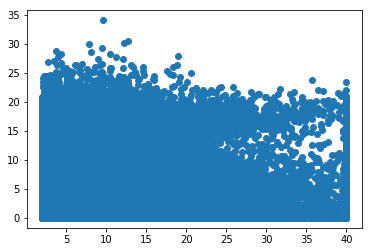

In [19]:
def calc_crr(ir, dif):
    a = 8e8
    b = -0.082
    c = 0.2
    d = -45.0
    f = 1.5
    g = -215.0
    h = 3.0
    j = 2.0

    return a*np.exp(b*ir)*np.exp( -0.5*np.square( (dif-(c*ir+d)) / (f*np.exp(-0.5*np.square((ir+g)/h))+j) ) )

crr = calc_crr(ir, dif)

plt.scatter(prp[prp>2],crr[prp>2])

In [35]:
from sklearn.ensemble import RandomForestRegressor

x = np.stack((dif[prp>.2],ir[prp>.2]),axis=1)

rf = RandomForestRegressor(max_depth=6, random_state=0)
rf.fit(x, prp[prp>.2])

rf.score(x, prp[prp>.2])

/home/pl5189/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.13628354248668428

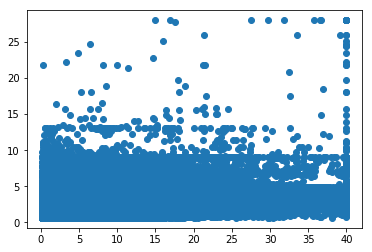

In [39]:
rfp = rf.predict(x)

plt.scatter(prp[prp>.2],rfp)

In [45]:
x = np.stack((b11[prp>.2],b16[prp>.2]), axis=1)

rf2 = RandomForestRegressor(max_depth=6, random_state=0)
rf2.fit(x, prp[prp>.2])

rf2.score(x, prp[prp>.2])

/home/pl5189/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.08738470312375192

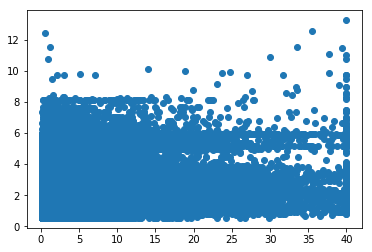

In [46]:
rfp2 = rf2.predict(x)

plt.scatter(prp[prp>.2],rfp2)

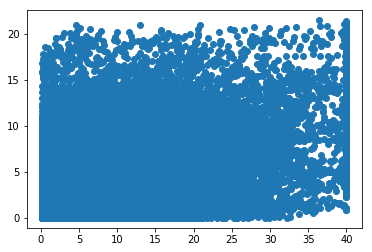

In [42]:
prp_hat = np.clip(np.load("/data/GPM_HIM8/models/yhat_SYD_v0_b11_16_s1.npy").flatten(),0,40)

plt.scatter(prp[prp>.2],prp_hat[prp>.2])

In [51]:
np.mean(np.square(prp[prp>.2]-prp_hat[prp>.2])),\
np.mean(np.square(prp[prp>.2]-rfp)),\
np.mean(np.square(prp[prp>.2]-rfp2)),\
np.mean(np.square(prp[prp>.2]-crr[prp>.2])),\
np.mean(np.square(prp[prp>.2]-crr2[prp>.2]))

(5.032777, 5.149239450987445, 5.440760853138368, 13.221353, 6.2404833)

/home/pl5189/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: x and y must be the same size

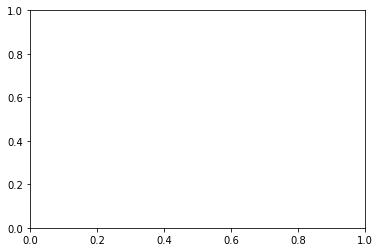

In [52]:
ir12 = np.load("/data/GPM_HIM8/exp_paper/X_B14_SYD_201812.npy")[:,::4,::4].flatten()
wv12 = np.load("/data/GPM_HIM8/exp_paper/X_B8_SYD_201812.npy")[:,::4,::4].flatten()
ir01 = np.load("/data/GPM_HIM8/exp_paper/X_B14_SYD_201901.npy")[:,::4,::4].flatten()
wv01 = np.load("/data/GPM_HIM8/exp_paper/X_B8_SYD_201901.npy")[:,::4,::4].flatten()
ir02 = np.load("/data/GPM_HIM8/exp_paper/X_B14_SYD_201902.npy")[:,::4,::4].flatten()
wv02 = np.load("/data/GPM_HIM8/exp_paper/X_B8_SYD_201902.npy")[:,::4,::4].flatten()

prp12 = np.clip(np.load("/data/GPM_HIM8/exp_paper/Y_SYD_201812.npy").flatten(),0,40)
prp01 = np.clip(np.load("/data/GPM_HIM8/exp_paper/Y_SYD_201901.npy").flatten(),0,40)
prp02 = np.clip(np.load("/data/GPM_HIM8/exp_paper/Y_SYD_201902.npy").flatten(),0,40)

irt = np.concatenate((ir12,ir01,ir02))
wvt = np.concatenate((wv12,wv01,wv02))
prpt = np.concatenate((prp12,prp01,prp02))
dift = irt-wvt

x = np.stack((dift,irt),axis=1)

rf = RandomForestRegressor(max_depth=6, random_state=0)
rf.fit(x, prpt)

rfp = rf.predict(np.stack((dif,ir), axis=1))

plt.scatter(prp[prp>.2],rfp)